In [1]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = r"C:\Users\tom_r\Downloads\RadioML 2018.01A\GOLD_XYZ_OSC.0001_1024.hdf5"

In [3]:
with h5py.File(file_path, 'r') as f:
    def print_structure(name, obj):
        print(name)

    f.visititems(print_structure)

X
Y
Z


X: I/Q components of the frame;
Y: Modulation of the frame (one-hot encoded)
Z: SNR of the frame

In [17]:
with h5py.File(file_path, 'r') as f:
    X = f['X']
    Y = f['Y']
    Z = f['Z']

    print(X.shape)
    print(Y.shape)
    print(Z.shape)

    
    x_sample = X[2555899]
    y_sample = Y[:2555904]
    z_sample = Z[:2555904]



(2555904, 1024, 2)
(2555904, 24)
(2555904, 1)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
i_values = []
q_values = []

time = [n for n in range(1024)]

for n in x_sample:
    i_values.append(n[0])
    q_values.append(n[1])


In [6]:
print(y_sample)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


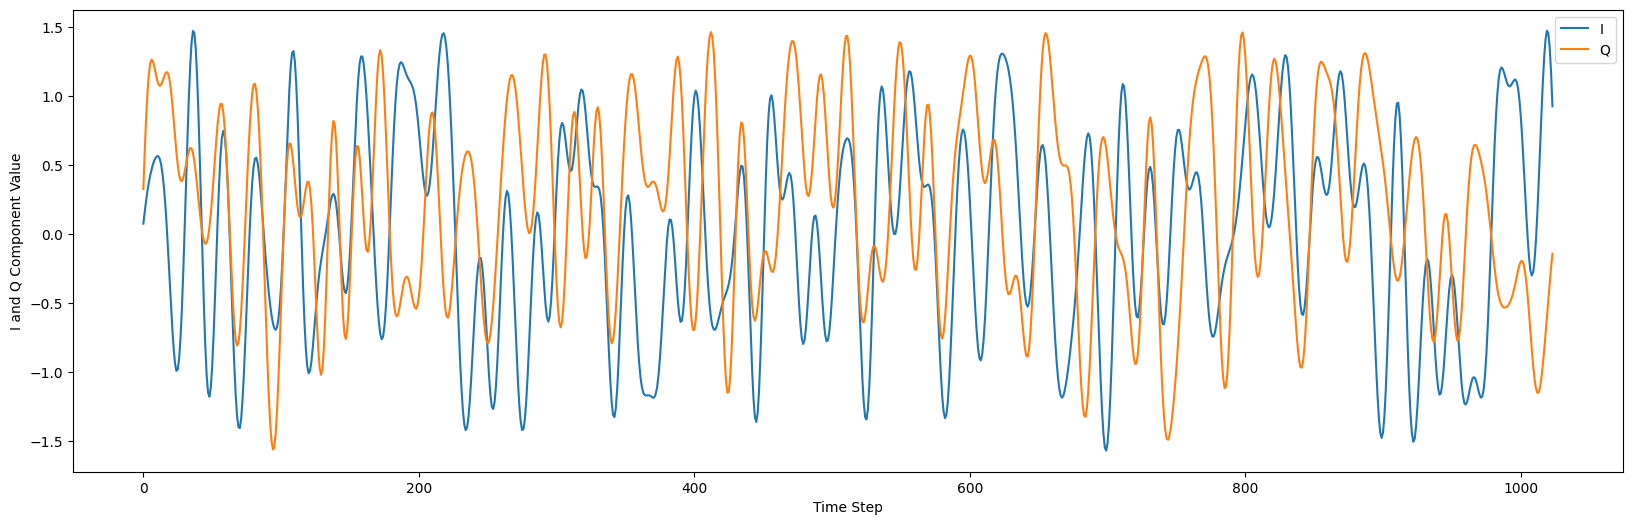

In [7]:
plt.figure(figsize=(20,6))
plt.xlabel("Time Step")
plt.ylabel("I and Q Component Value")
plt.plot(time, i_values, label='I')
plt.plot(time, q_values, label='Q')
plt.legend()

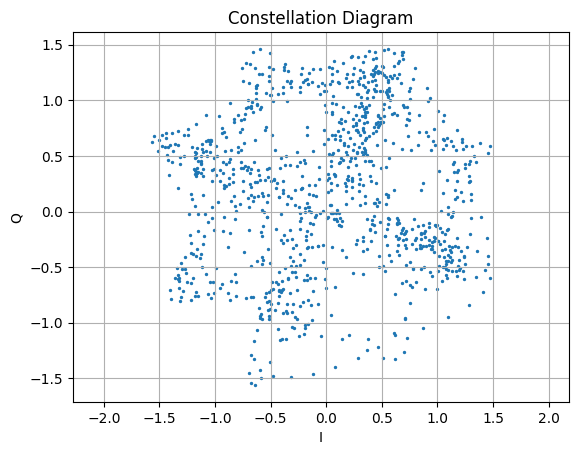

In [8]:
plt.scatter(i_values, q_values, s=2)
plt.xlabel("I")
plt.ylabel("Q")
plt.title("Constellation Diagram")
plt.axis('equal')
plt.grid(True)
plt.show()

In [9]:
classes = ['OOK','4ASK','8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK', '16APSK', '32APSK',
           '64APSK', '128APSK', '16QAM', '32QAM', '64QAM', '128QAM', '256QAM', 'AM-SSB-WC',
           'AM-SSB-SC', 'AM-DSB-WC', 'AM-DSB-SC', 'FM', 'GMSK', 'OQPSK']

y = pd.DataFrame(y_sample) # y sample is the whole y component not just the first 100
y

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2555900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2555901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2555902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
for col in y.columns.values:
    print(col, sum(y[col]))

0 106496
1 106496
2 106496
3 106496
4 106496
5 106496
6 106496
7 106496
8 106496
9 106496
10 106496
11 106496
12 106496
13 106496
14 106496
15 106496
16 106496
17 106496
18 106496
19 106496
20 106496
21 106496
22 106496
23 106496


In [12]:
z = pd.DataFrame(z_sample) # SNR
z.value_counts()

0  
-20    98304
-18    98304
-16    98304
-14    98304
-12    98304
-10    98304
-8     98304
-6     98304
-4     98304
-2     98304
 0     98304
 2     98304
 4     98304
 6     98304
 8     98304
 10    98304
 12    98304
 14    98304
 16    98304
 18    98304
 20    98304
 22    98304
 24    98304
 26    98304
 28    98304
 30    98304
Name: count, dtype: int64

In [13]:
def plot_waveform(x_sample, ax, title="Waveform"):
    i_values = [n[0] for n in x_sample]
    q_values = [n[1] for n in x_sample]
    ax.plot(i_values, label='I')
    ax.plot(q_values, label='Q')
    ax.set_title(title)
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Amplitude")
    ax.legend()

def plot_constellation(x_sample, ax, title="Constellation"):
    i_values = [n[0] for n in x_sample]
    q_values = [n[1] for n in x_sample]
    ax.scatter(i_values, q_values, s=2)
    ax.set_title(title)
    ax.set_xlabel("I")
    ax.set_ylabel("Q")
    ax.axis('equal')
    ax.grid(True)

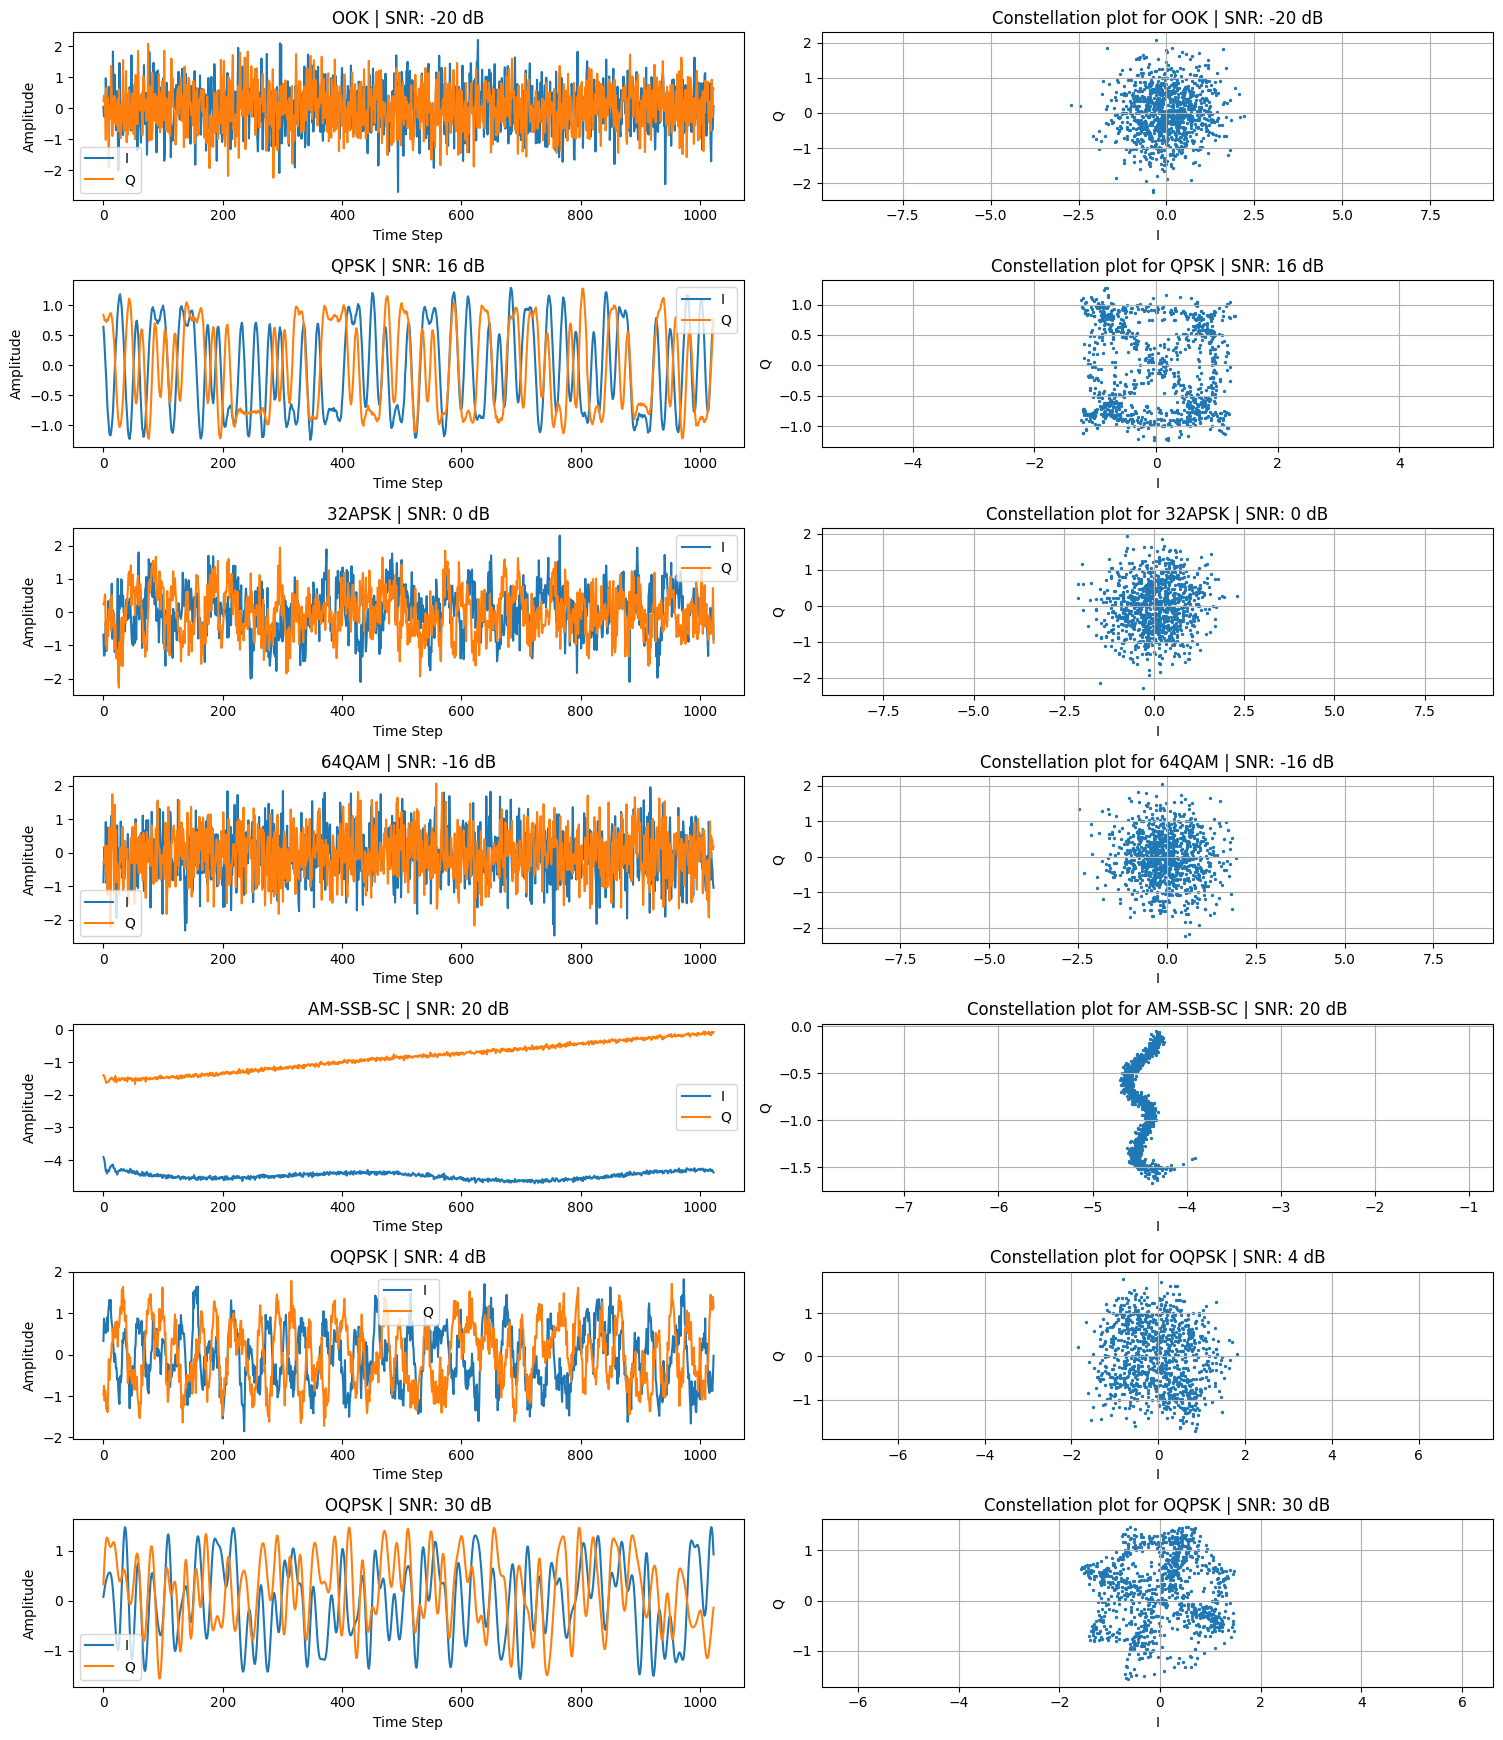

In [14]:
indices = [0, 500000, 1000000, 1500000, 2000000, 2500000, 2555899]


classes = ['OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK',
           '16APSK', '32APSK', '64APSK', '128APSK', '16QAM', '32QAM', '64QAM',
           '128QAM', '256QAM', 'AM-SSB-WC', 'AM-SSB-SC', 'AM-DSB-WC',
           'AM-DSB-SC', 'FM', 'GMSK', 'OQPSK']

with h5py.File(file_path, 'r') as f:
    x_samples = [f['X'][n] for n in indices]
    y_samples = [f['Y'][n] for n in indices]
    z_samples = [f['Z'][n][0] for n in indices]

fig, axes = plt.subplots(len(x_samples), 2, figsize=(15, 2.5 * len(x_samples)))

for i, (x, y, z) in enumerate(zip(x_samples, y_samples, z_samples)):
    mod_idx = np.argmax(y)
    mod_class = classes[mod_idx]
    snr = z

    waveform_title = f"{mod_class} | SNR: {snr} dB"
    constellation_title = f"Constellation plot for {waveform_title}" 

    plot_waveform(x, ax=axes[i, 0], title=waveform_title)
    plot_constellation(x, ax=axes[i, 1], title=constellation_title)

plt.tight_layout()
plt.savefig(r"C:\Users\tom_r\Desktop\Machine-Learning\RF_spectrum_analysis\plots\spectrum_plots.png")
plt.show()
